## Random Forest - Credit card default Prediction

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('credit-card-default.csv')
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [5]:
# Lets understand the type of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_0      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

### Data Preparation - X/y

In [6]:
df = df.drop('ID', axis=1)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
# Putting feature variable to X
X = df.drop('defaulted', axis=1)

# Putting response variable to y
y =df['defaulted']

In [9]:
y

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: defaulted, Length: 30000, dtype: int64

In [10]:
X

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,3502,8979,5190,0,1837,3526,8998,129,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,2758,20878,20582,19357,0,0,22000,4200,2000,3100
29998,80000,1,3,1,41,1,-1,0,0,0,...,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804


## Building our first Random Forest Model with Defualt hyperparameters

In [11]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state=101)

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
rfc = RandomForestClassifier()

In [14]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [15]:
# Making the predictions 
predictions = rfc.predict(X_test)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [17]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7058
           1       0.65      0.37      0.47      1942

    accuracy                           0.82      9000
   macro avg       0.75      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000



In [18]:
print(confusion_matrix(y_test, predictions))

[[6666  392]
 [1227  715]]


In [19]:
print(accuracy_score(y_test,predictions))

0.8201111111111111


### Hyperparameter Tuning

The following hyperparameters are present in a random forest classifier. Note that most of these hypereparameters are actually of the decision trees that are in the forest.

- n_estimators: integer, optional (default=10): The number of trees in the forest.
- criterion: string, optional (default=”gini”)The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. Note: this parameter is tree-specific.
- max_features : int, float, string or None, optional (default=”auto”)The number of features to consider when looking for the best split.
- max_depth : integer or None, optional (default=None)The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
- min_samples_split : int, float, optional (default=2)The minimum number of samples required to split an internal node.
- min_samples_leaf : int, float, optional (default=1)The minimum number of samples required to be at a leaf node.
- min_weight_fraction_leaf : float, optional (default=0.)The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.
- max_leaf_nodes : int or None, optional (default=None)Grow trees with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.
- min_impurity_split : float,Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.


### Tuning max_depth
- Let's try to find the optimum values for max_depth and understand how the value of max_depth impacts the overall accuracy of the ensemble.

In [20]:
# GridSearchCV to find optimal max_depth

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 10, 1)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, n_jobs = -1, 
                   scoring="accuracy", return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(2, 10)}, return_train_score=True,
             scoring='accuracy')

In [21]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.292891,0.058118,0.059379,0.004570,2,{'max_depth': 2},0.803571,0.803333,0.799286,0.797381,...,0.800286,0.002662,8,0.802202,0.800417,0.796845,0.803393,0.801607,0.800893,0.002240
1,1.793225,0.250808,0.100257,0.024508,3,{'max_depth': 3},0.810952,0.807381,0.808095,0.805000,...,0.807333,0.002169,7,0.809048,0.804702,0.808036,0.810655,0.808155,0.808119,0.001948
2,2.146703,0.293699,0.073317,0.022190,4,{'max_depth': 4},0.812619,0.814762,0.811667,0.804286,...,0.810429,0.003618,6,0.811310,0.810119,0.813274,0.812143,0.812619,0.811893,0.001094
3,2.195470,0.023715,0.063436,0.002732,5,{'max_depth': 5},0.815952,0.817143,0.812857,0.806667,...,0.812190,0.004111,5,0.822857,0.815774,0.817857,0.815238,0.814702,0.817286,0.002984
4,2.500098,0.022553,0.067573,0.002940,6,{'max_depth': 6},0.815238,0.816429,0.814762,0.816905,...,0.816571,0.001667,4,0.826429,0.822500,0.821071,0.827083,0.827738,0.824964,0.002667


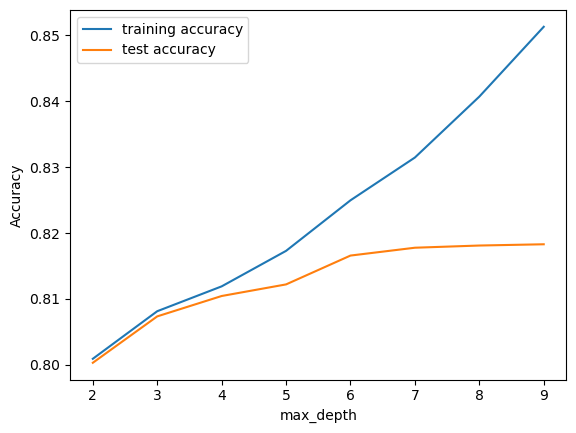

In [22]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Tuning n_estimators

Let's try to find the optimum values for n_estimators and understand how the value of n_estimators impacts the overall accuracy. Notice that we'll specify an appropriately low value of max_depth, so that the trees do not overfit.

In [23]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1000, 150)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=5)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, n_jobs = -1, 
                   scoring="accuracy", return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=5), n_jobs=-1,
             param_grid={'n_estimators': range(100, 1000, 150)},
             return_train_score=True, scoring='accuracy')

In [26]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.277540,0.054669,0.093783,0.030416,100,{'n_estimators': 100},0.814762,0.817143,0.813095,0.805238,...,0.812333,0.004019,4,0.814940,0.816726,0.817738,0.815476,0.816190,0.816214,0.000975
1,5.467722,0.084893,0.177429,0.025486,250,{'n_estimators': 250},0.814762,0.816667,0.812143,0.807857,...,0.812667,0.002979,3,0.818571,0.816131,0.815238,0.815714,0.817202,0.816571,0.001192
2,8.677550,0.111808,0.240817,0.006241,400,{'n_estimators': 400},0.814286,0.815952,0.811429,0.807143,...,0.811952,0.003028,5,0.818155,0.815714,0.816071,0.815655,0.816012,0.816321,0.000931
3,12.093830,0.048003,0.342097,0.007075,550,{'n_estimators': 550},0.815238,0.817143,0.812381,0.808571,...,0.813238,0.002895,1,0.817381,0.815714,0.816667,0.816012,0.816845,0.816524,0.000596
4,15.963971,0.365232,0.466128,0.077870,700,{'n_estimators': 700},0.814048,0.814762,0.811905,0.808333,...,0.811905,0.002347,6,0.815714,0.814405,0.815238,0.815417,0.815655,0.815286,0.000472


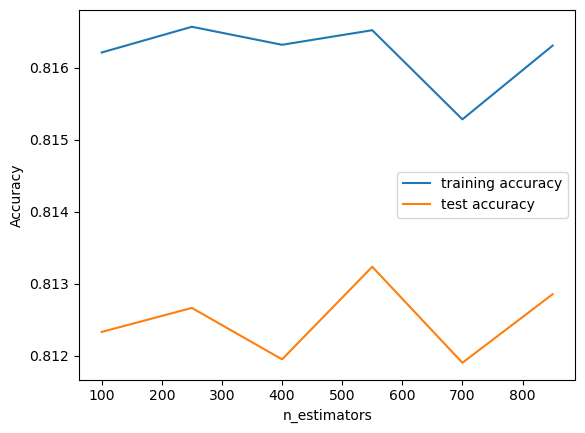

In [27]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Tuning max_features
- Let's see how the model performance varies with max_features, which is the maximum numbre of features considered for splitting at a node.

In [31]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=5, n_estimators=700)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, n_jobs = -1, 
                   scoring="accuracy", return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=5, n_estimators=700),
             n_jobs=-1, param_grid={'max_features': [4, 8, 14, 20, 24]},
             return_train_score=True, scoring='accuracy')

In [32]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,16.360758,0.511890,0.438151,0.018760,4,{'max_features': 4},0.814524,0.815952,0.812381,0.806190,...,0.812095,0.003352,4,0.817500,0.815298,0.816131,0.815655,0.816131,0.816143,0.000748
1,27.173008,0.180636,0.541333,0.190326,8,{'max_features': 8},0.817857,0.821190,0.819524,0.817619,...,0.819095,0.001290,2,0.823988,0.822143,0.823274,0.823869,0.823810,0.823417,0.000682
2,44.709644,0.279968,0.445244,0.045561,14,{'max_features': 14},0.818333,0.821667,0.818810,0.818333,...,0.819190,0.001256,1,0.824583,0.823333,0.823810,0.825357,0.825119,0.824440,0.000767
3,55.787041,5.568406,0.322198,0.082498,20,{'max_features': 20},0.817857,0.822143,0.818571,0.818333,...,0.819048,0.001565,3,0.825238,0.824167,0.823750,0.826488,0.826250,0.825179,0.001089
4,0.458194,0.027461,0.000000,0.000000,24,{'max_features': 24},NaN,NaN,NaN,NaN,...,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


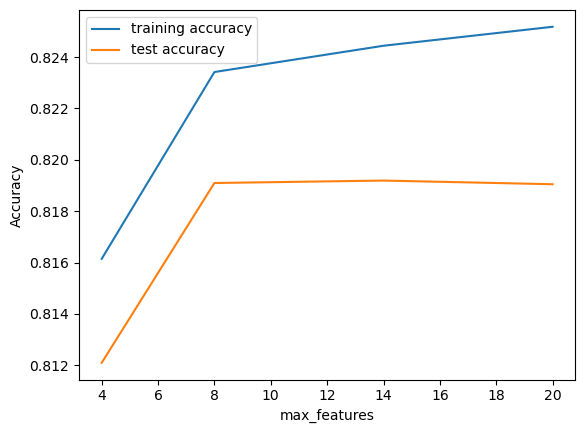

In [33]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Tuning min_sample_leaf
The hyperparameter min_samples_leaf is the minimum number of samples required to be at a leaf node:

- If int, then consider min_samples_leaf as the minimum number.
- If float, then min_samples_leaf is a percentage and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.



In [34]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier(max_depth=5, n_estimators=700, max_features=8)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, n_jobs = -1, 
                   scoring="accuracy", return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=5, max_features=8,
                                              n_estimators=700),
             n_jobs=-1, param_grid={'min_samples_leaf': range(100, 400, 50)},
             return_train_score=True, scoring='accuracy')

In [35]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,35.548324,4.732574,0.823657,0.048963,100,{'min_samples_leaf': 100},0.816429,0.820952,0.819286,0.816429,...,0.817714,0.002063,4,0.819940,0.818988,0.819821,0.820357,0.819345,0.819690,0.000477
1,40.129258,4.528552,0.718085,0.163244,150,{'min_samples_leaf': 150},0.815952,0.821667,0.820000,0.816429,...,0.817952,0.002422,1,0.818869,0.817917,0.818095,0.819167,0.818810,0.818571,0.000481
2,33.175885,0.446055,0.681203,0.104548,200,{'min_samples_leaf': 200},0.816190,0.821429,0.820000,0.815952,...,0.817857,0.002381,3,0.818750,0.817500,0.818333,0.819345,0.818750,0.818536,0.000610
3,35.487773,1.645874,0.662464,0.087837,250,{'min_samples_leaf': 250},0.816429,0.820952,0.820714,0.815952,...,0.817952,0.002365,1,0.818929,0.818095,0.817738,0.818690,0.818869,0.818464,0.000468
4,33.024300,0.190958,1.075166,0.381454,300,{'min_samples_leaf': 300},0.816429,0.821667,0.817857,0.815476,...,0.817476,0.002242,5,0.818929,0.817738,0.817857,0.819167,0.818869,0.818512,0.000593


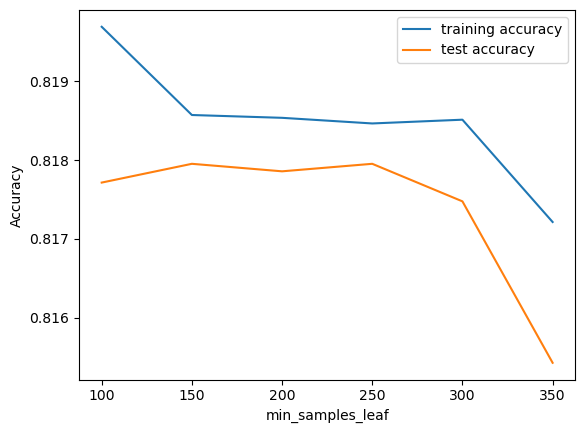

In [36]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Tuning min_samples_split

In [37]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier(max_depth=5, n_estimators=700, max_features=8, min_samples_leaf=200)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, n_jobs = -1, 
                   scoring="accuracy", return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=5, max_features=8,
                                              min_samples_leaf=200,
                                              n_estimators=700),
             n_jobs=-1, param_grid={'min_samples_split': range(200, 500, 50)},
             return_train_score=True, scoring='accuracy')

In [38]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,29.895282,2.925211,0.433550,0.015580,200,{'min_samples_split': 200},0.815952,0.821429,0.820238,0.816190,...,0.817905,0.002425,4,0.81875,0.818036,0.818095,0.818929,0.818750,0.818512,0.000371
1,24.103034,0.111410,0.434925,0.011626,250,{'min_samples_split': 250},0.816190,0.821190,0.819524,0.816190,...,0.817762,0.002190,6,0.81869,0.818036,0.818690,0.819048,0.818750,0.818643,0.000331
2,23.914594,0.061495,0.436442,0.002892,300,{'min_samples_split': 300},0.816190,0.822143,0.819762,0.816190,...,0.818000,0.002531,1,0.81869,0.817619,0.818095,0.819107,0.818869,0.818476,0.000544
3,23.744784,0.093707,0.560513,0.062895,350,{'min_samples_split': 350},0.816429,0.821429,0.820476,0.816190,...,0.818000,0.002449,1,0.81869,0.817798,0.817917,0.818750,0.818810,0.818393,0.000441
4,25.386480,0.473739,0.452151,0.016079,400,{'min_samples_split': 400},0.816190,0.821429,0.819762,0.816429,...,0.817905,0.002271,4,0.81875,0.817917,0.817917,0.818988,0.818690,0.818452,0.000449


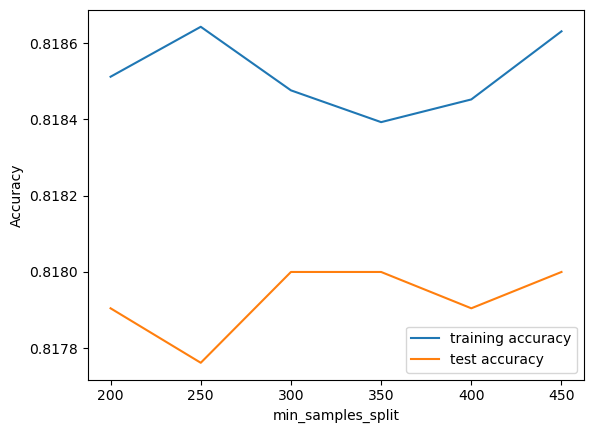

In [39]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Grid Search to Find Optimal Hyperparameters

In [24]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [3,8,1],
    'min_samples_leaf': range(100, 400, 100),
    'min_samples_split': range(200, 500, 100),
    'n_estimators': [100,1000, 150], 
    'max_features': [5, 10, 1]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1, return_train_score=True)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 243 candidates, totalling 729 fits


In [ ]:
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)